code to generate the sortability graph of r-uniform sock sequences

In [21]:
import math
import string
from datetime import datetime
alphabet = list(string.ascii_lowercase)
print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [31]:
def sequence_to_partition(p):
    """
    input: p (str or list) - sock ordering
    returns: partition (set) - corresponding set partition
    """
    sock_to_index = {} 
    for i in range(len(p)):
        sock = p[i]
        sock_to_index.setdefault(sock, set()).add(i)
    for sock in sock_to_index:
        sock_to_index[sock] = frozenset(sock_to_index[sock])
    partition = list(sock_to_index.values())
    return partition

def get_partition_size(partition):
    size = 0
    for subset in partition:
        size += len(subset)
    return size

def partition_to_standard_seq(partition):
    N = get_partition_size(partition)
    standard_seq = [0] * N
    for i in range(len(partition)):
        for idx in partition[i]:
            standard_seq[idx] = alphabet[i]
    standard_seq_str = ''
    for sock in standard_seq:
        standard_seq_str += str(sock)
    return standard_seq_str

def get_standardized(p):
    return partition_to_standard_seq(sequence_to_partition(p))

In [43]:
print(sequence_to_partition('ccbbdcd'))
print(get_partition_size(sequence_to_partition('ccbbdcd')))
print(partition_to_standard_seq(sequence_to_partition('ccbbdcd')))

[frozenset({0, 1, 5}), frozenset({2, 3}), frozenset({4, 6})]
7
aabbcac


In [45]:
from sage.combinat.permutation import Permutations_mset
mset = ['a', 'b', 'c', 'a', 'b', 'c']
perms = Permutations_mset(mset)
len(perms)
for perm in perms:
    print(perm)

['a', 'a', 'b', 'b', 'c', 'c']
['a', 'a', 'b', 'c', 'b', 'c']
['a', 'a', 'b', 'c', 'c', 'b']
['a', 'a', 'c', 'b', 'b', 'c']
['a', 'a', 'c', 'b', 'c', 'b']
['a', 'a', 'c', 'c', 'b', 'b']
['a', 'b', 'a', 'b', 'c', 'c']
['a', 'b', 'a', 'c', 'b', 'c']
['a', 'b', 'a', 'c', 'c', 'b']
['a', 'b', 'b', 'a', 'c', 'c']
['a', 'b', 'b', 'c', 'a', 'c']
['a', 'b', 'b', 'c', 'c', 'a']
['a', 'b', 'c', 'a', 'b', 'c']
['a', 'b', 'c', 'a', 'c', 'b']
['a', 'b', 'c', 'b', 'a', 'c']
['a', 'b', 'c', 'b', 'c', 'a']
['a', 'b', 'c', 'c', 'a', 'b']
['a', 'b', 'c', 'c', 'b', 'a']
['a', 'c', 'a', 'b', 'b', 'c']
['a', 'c', 'a', 'b', 'c', 'b']
['a', 'c', 'a', 'c', 'b', 'b']
['a', 'c', 'b', 'a', 'b', 'c']
['a', 'c', 'b', 'a', 'c', 'b']
['a', 'c', 'b', 'b', 'a', 'c']
['a', 'c', 'b', 'b', 'c', 'a']
['a', 'c', 'b', 'c', 'a', 'b']
['a', 'c', 'b', 'c', 'b', 'a']
['a', 'c', 'c', 'a', 'b', 'b']
['a', 'c', 'c', 'b', 'a', 'b']
['a', 'c', 'c', 'b', 'b', 'a']
['b', 'a', 'a', 'b', 'c', 'c']
['b', 'a', 'a', 'c', 'b', 'c']
['b', 'a

# functions for checking sortability

In [31]:
def check_sorted(p):
    """
    input: sock_orders (set) - set of sock orders
    returns: answer (bool) - whether or not sock_orders contains the unique sorted sock order
    """
    colors = set()
    i = 0
    while i in range(len(p)):
        current_color = p[i]
#         print(f'current color = {current_color}')
        if current_color not in colors:
            colors.add(current_color)
            while i in range(len(p)) and p[i] == current_color:
                i += 1
#                 print(i)
        else:
            return False
    return True

def contains_sorted(sock_orders):
    """
    input: sock_orders (set) - set of sock orders
    returns: answer (bool) - whether or not sock_orders contains the unique sorted sock order
    """
    answer = False
    for sock_order in sock_orders:
        if check_sorted(sock_order):
            answer = True
    return answer

In [42]:
print(check_sorted('aaabcd'))
print(check_sorted('aaabcad'))

True
False


# functions for BFS-ing sock orders

In [195]:
def dyck_word_to_sorting(p, dyck_word):
    """
    inputs: p (str) - sock ordering, dyck_word
    returns: resulting sock ordering from applying the stack sort corresponding to dyck_word 
    """
    stack = []
    p_seq = list(p)
    result = '' # resulting sock ordering
    
    for step in dyck_word:
        if step == 1: # push
            stack.append(p_seq.pop(0))
        else: # pop
            last_sock = stack.pop()
            result += last_sock
    return result
    
# compute all possible sequences in foot(p)

def foot(p, std = True):
    """
    input: p - str, sock ordering
    returns: set of all (standardized) sock orderings achievable from stack-sorting p once
    """
    # std = standardized or not
    N = len(p)
    sock_orders = set()
    dyck_words_list = DyckWords(N).list()
    for dyck_word in dyck_words_list:
        if std:
            sock_orders.add(get_standardized(dyck_word_to_sorting(p, dyck_word)))
        else:
            sock_orders.add(dyck_word_to_sorting(p, dyck_word))
    return sock_orders # not necessarily injective from dyck_words to orders

def foot_k_full(p, k):
    # make every sock order standardized
    # do full BFS up to distance k
    p_stand = get_standardized(p)
    parents = {p_stand:None}
    levels = [[p_stand]]
    
    while len(levels[-1]) > 0 and len(levels) <= k:
        levels.append([])
        for u in levels[-2]:
            for v in foot(u):
                if v not in parents:
                    levels[-1].append(v)
                    parents[v] = u
                
    return parents, levels

def foot_k_search(p,k):
    # do BFS until find sorted or reach depth k, whichever occurs first
    p_stand = get_standardized(p)
    parents = {p_stand:None}
    levels = [[p_stand]]
    if check_sorted(p_stand):
        return p_stand
    
    while len(levels[-1]) > 0 and len(levels) <= k:
        levels.append([])
        for u in levels[-2]:
            for v in foot(u):
                if v not in parents:
                    levels[-1].append(v)
                    parents[v] = u
                    if check_sorted(v):
                        return v
    return None # if no sorted found within distance k

def foot_search(p):
    # do BFS until reach sorted sock order, return sorted order and distance from p
    p_stand = get_standardized(p)
    parents = {p_stand:None}
    levels = [[p_stand]]
    if check_sorted(p_stand):
        return (p_stand, 0)
    
    while len(levels[-1]) > 0:
        levels.append([])
        for u in levels[-2]:
            for v in foot(u):
                if v not in parents:
                    levels[-1].append(v)
                    parents[v] = u
                    if check_sorted(v):
                        return (v, len(levels)-1)
    return None # if no sorted found, should never reach this (log2(n) levels suffices)

    
#     def foot_k_search_helper(p,k): # DFS
#         # returns sorted sock ordering, otherwise none
#         p_stand = get_standardized(p) # shouldn't need to standardize but test out bugs
#         if k == 0: # base case
#             if check_sorted(p_stand):
#                 return p_stand
#             return None
        
#         if check_sorted(p_stand):
#             return p_stand
#         for v in foot(u):
#             if v not in visited: # don't look at visited nodes - never helps to search in cycle
#                 v_sortability = foot_k_search_helper(v, k-1):
#                 if v_sortability:
#                     return v_sortability    

In [65]:
foot_k_full('aab', 2)

({'aab': None, 'aba': 'aab', 'abb': 'aab'}, [['aab'], ['aba', 'abb'], []])

In [196]:
print(foot_k_search('ababab', 1))

aaabbb


In [205]:
foot_search('abcdabcd')

('aabbccdd', 2)

Current bound for $(n,r)$-ordering ($n$ colors, $r$-uniform) is that you need at least $\lfloor((r-1/r)\log_4(n)\rfloor$ stacks. For $r=2$, this is equal to $\lfloor(1/2\log_4(n)\rfloor$. Try different $n$, try to find $(r,n)$ ordering that needs more than and see where this breaks?

In [74]:
# find_min_stacks('abcabcabc')

2

# functions for generating sock orderings

In [137]:
def get_standardized_list(sock_orders):
    # given input list of sock_orders, return list of standardized sock orders
    return list({get_standardized(sock_order) for sock_order in sock_orders})

def stringify_list(L):
    string = ''
    for l in L:
        string += str(l)
    return string

def get_sock_orders(m_set, std = True): # given input multiset m_set, generate all possible sock orders
    all_orders = Arrangements(m_set, len(m_set)).list()   
    if not std:
        return [stringify_list(order) for order in all_orders]
    return get_standardized_list(all_orders)

# functions for generating multisets quickly
def uniform_sock_orders(r, n, std = True): # r socks of n colors
    m_set = []
    for i in range(n):
        for j in range(r):
            m_set.append(alphabet[i])
    return get_sock_orders(m_set, std)

def fast_sock_orders(socks, std = True): # input mults is list of 2 lists, first list = colors, second = multiplicities
    m_set = []
    mults = socks[0]
    
    if len(socks) == 1: # default is to make colors in alphabetical order
        for i in range(len(mults)):
            for j in range(mults[i]):
                m_set.append(alphabet[i])       
        return get_sock_orders(m_set, std)
     
    colors = socks[1]
    assert len(colors) == len(mults), 'given # of socks must be same as given # of multiplicities'
    for i in range(len(mults)):
        for j in range(mults[i]):
            m_set.append(colors[i])   
    return get_sock_orders(m_set, std)

In [55]:
get_sock_orders(['a', 'a', 'b', 'b'], False)

['aabb', 'abab', 'abba', 'baab', 'baba', 'bbaa']

In [179]:
# EXAMPLES

# sock_orders(['a', 'a', 'b', 'b', 'c', 'c'])
uniform_sock_orders(3,3)
# fast_sock_orders([[2, 2, 1], ['b', 'c', 'd']])
# fast_sock_orders([[2, 2, 1]])

['abbcbaacc',
 'abbbcaacc',
 'abbbaccac',
 'abbacabcc',
 'abacbcbca',
 'aabbcabcc',
 'abcbaacbc',
 'abcabbacc',
 'abccaacbb',
 'abcabccab',
 'abcabcbac',
 'abcbbaacc',
 'abbcabcca',
 'abbccacab',
 'aaabbccbc',
 'abcbccaba',
 'aabbbaccc',
 'abccbaacb',
 'abcbacbac',
 'abcbaabcc',
 'aabcacbbc',
 'abbabccac',
 'abcacabbc',
 'abaccbabc',
 'aabbcbcca',
 'abccbbcaa',
 'aabbabccc',
 'abccaabbc',
 'abccabcba',
 'aababcccb',
 'aabbacbcc',
 'aabbcaccb',
 'aabccbbca',
 'aaabccbcb',
 'abaacbbcc',
 'abbaccbac',
 'abbccbcaa',
 'aabccbacb',
 'abcacbbac',
 'abaabccbc',
 'ababacbcc',
 'abacabcbc',
 'abbcaacbc',
 'abbabcacc',
 'abcbacabc',
 'ababcaccb',
 'abbacacbc',
 'abbacbcac',
 'aabcbbcac',
 'abbbcacca',
 'abcacacbb',
 'abaccbacb',
 'abbacbacc',
 'ababccbac',
 'abbcccaba',
 'aaabcbccb',
 'abbaacbcc',
 'abbcaccba',
 'abacbcbac',
 'abccbbaca',
 'abcaaccbb',
 'abacbccab',
 'abaccbbac',
 'aabcbabcc',
 'aabcbccba',
 'abbbccaca',
 'abbbcccaa',
 'abbcbccaa',
 'abbccabac',
 'abcabcbca',
 'abaaccbbc',
 'abcc

# calculating lower bounds for # stacks

In [219]:
# r = 2, n = 2

def get_uniformity(p):
    """
    input: sock_orders (set) - set of sock orders
    returns: n, r (tup) assuming that p is a uniform ordering
    """
    n = len(set(p))
    r = int(len(p)/n)
    return n,r

def sortable_in_log4_stacks(p):
    """
    input: p (str) - sock ordering
    returns: answer (bool) - whether or not you can sort in (r-1/r)log4(n) stacks"""
    n,r = get_uniformity(p)
    candidate_stack_num = math.floor((r-1)/r*math.log(n, 4))
    print(f'r-1/r*log4n stack number = {candidate_stack_num}')
    if foot_k_search(p, candidate_stack_num):
        return True
    return False

def stacks_needed(r, n):
    # return max number of stacks needed to sort r, n uniform sock ordering
    # as well as the sock order that achieved this 
    sock_orders = uniform_sock_orders(r, n)
    max_stacks = 0
    bad_sock_order = None
    for sock_order in sock_orders:
        sorted_order, stacks_needed = foot_search(sock_order)
#         assert stacks_needed <= math.ceil(math.log(n, 2)), 'ceil(log_2(n)) stacks should always suffice'
        if stacks_needed > max_stacks:
            max_stacks = stacks_needed
            bad_sock_order = sock_order
    return max_stacks, bad_sock_order

In [220]:
# uniform_sock_orders(2,1)
for order in uniform_sock_orders(2,4):
    print(foot_search(order))

('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 2)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 2)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 2)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 2)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 2)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 2)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbccdd', 2)
('aabbccdd', 1)
('aabbccdd', 1)
('aabbcc

In [200]:
# r = 2, n = 4 - only get 0 stacks, so can take any unsorted sock ordering
# sortable_in_log4_stacks('aabbccdd')
# 1 stack - requires at least 16 colors
# r = 2, n = 9 - still only get 0 stacks, so can take any unsorted sock ordering
print(sortable_in_log4_stacks('aabbccddeeffgghhii'))
print(sortable_in_log4_stacks('aabbccddeeffgghhii'))

r-1/r*log4n stack number = 0
True
r-1/r*log4n stack number = 0
True


In [ ]:
# fixing r = 2 first
for n in range(1,10):
    max_stacks, bad_sock_order = stacks_needed(2,n)
    print(f'max stacks = {max_stacks}')
    print(f'bad sock order = {bad_sock_order}')
    print(f'expected floor(1/2 * log4(n)) = {math.floor(1/2 * math.log(n, 4))}')
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(f'current time = {current_time}')
    print('--------')

max stacks = 0
bad sock order = None
expected floor(1/2 * log4(n)) = 0
current time = 21:45:46
--------
max stacks = 1
bad sock order = abba
expected floor(1/2 * log4(n)) = 0
current time = 21:45:46
--------
max stacks = 1
bad sock order = abcabc
expected floor(1/2 * log4(n)) = 0
current time = 21:45:46
--------
max stacks = 2
bad sock order = abcdcbad
expected floor(1/2 * log4(n)) = 0
current time = 21:45:49
--------
max stacks = 2
bad sock order = abcdceadeb
expected floor(1/2 * log4(n)) = 0
current time = 21:53:24
--------


# sortability graph stuff

In [74]:
for v in sort_graph.vertex_iterator():
    print(f'degree of vertex {v} = {sort_graph.degree(v)}')

degree of vertex aabbcc = 16
degree of vertex abcabc = 16
degree of vertex aabccb = 16
degree of vertex abcbca = 16
degree of vertex abbcca = 16
degree of vertex abaccb = 16
degree of vertex abacbc = 16
degree of vertex abcbac = 16
degree of vertex abcacb = 16
degree of vertex abbacc = 16
degree of vertex abccab = 16
degree of vertex abccba = 16
degree of vertex aabcbc = 16
degree of vertex ababcc = 16
degree of vertex abbcac = 16


In [80]:
# [catalan_number(k) for k in range(1, 11)]
[binomial(2*n,n)/(n+1) for n in range(1, 11)]

[1, 2, 5, 14, 42, 132, 429, 1430, 4862, 16796]

In [145]:
def get_degrees(graph):
    degrees = {}
    for v in graph.vertex_iterator():
        v_deg = graph.degree(v)
        degrees[v] = v_deg
    return degrees

def get_sort_graph(r, n, std = True):
    uniform_orders = uniform_sock_orders(r, n, std)
    children = {}
    for order in uniform_orders:
        children[order] = list(foot(order, std))
    sort_graph = Graph(children)
    sort_graph.set_pos(sort_graph.layout_circular())
    show(sort_graph)
    print(f'raw degree = C_{r*n} = {catalan_number(r*n)}')
    return sort_graph


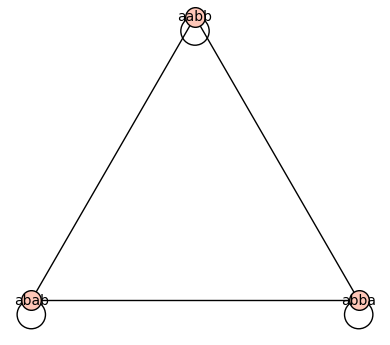

raw degree = C_4 = 14
graph as 3 vertices


{'aabb': 4, 'abba': 4, 'abab': 4}

In [150]:
sort_graph = get_sort_graph(2,2)
print(f'graph as {sort_graph.order()} vertices')
get_degrees(sort_graph)

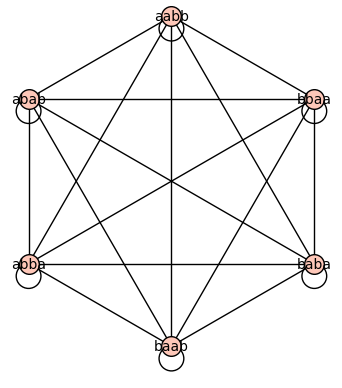

raw degree = C_4 = 14
graph as 6 vertices


{'baba': 7, 'aabb': 7, 'baab': 7, 'abba': 7, 'abab': 7, 'bbaa': 7}

In [151]:
sort_graph = get_sort_graph(2,2, False)
print(f'graph as {sort_graph.order()} vertices')
get_degrees(sort_graph)

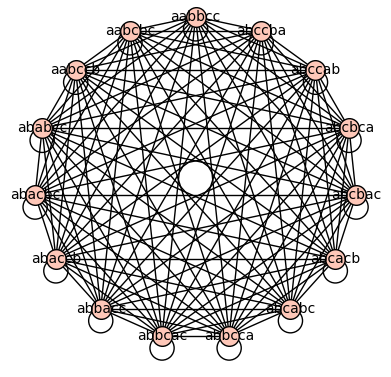

raw degree = C_6 = 132
graph as 15 vertices


{'aabbcc': 16,
 'abcabc': 16,
 'aabccb': 16,
 'abcbca': 16,
 'abbcca': 16,
 'abaccb': 16,
 'abacbc': 16,
 'abcbac': 16,
 'abcacb': 16,
 'abbacc': 16,
 'abccab': 16,
 'abccba': 16,
 'aabcbc': 16,
 'ababcc': 16,
 'abbcac': 16}

In [152]:
sort_graph = get_sort_graph(2,3)
print(f'graph as {sort_graph.order()} vertices')
get_degrees(sort_graph)

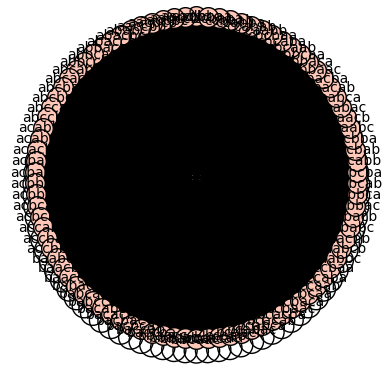

raw degree = C_6 = 132
graph as 90 vertices


{'abaccb': 77,
 'bbaacc': 68,
 'bccbaa': 74,
 'acabcb': 84,
 'acacbb': 80,
 'acbabc': 83,
 'bacacb': 78,
 'baccba': 75,
 'bacabc': 83,
 'acbacb': 79,
 'cbcaab': 77,
 'cbcbaa': 80,
 'abccba': 79,
 'cabcab': 79,
 'bbacac': 80,
 'ccbaba': 80,
 'bccaba': 77,
 'bcaabc': 75,
 'caabcb': 77,
 'aabccb': 74,
 'baabcc': 74,
 'acbcab': 83,
 'accbba': 68,
 'aacbcb': 80,
 'bcbaca': 84,
 'cbbcaa': 74,
 'cabacb': 83,
 'bbcaac': 74,
 'bcacab': 78,
 'bacbca': 83,
 'accabb': 74,
 'ccabab': 80,
 'abbcac': 77,
 'cbabca': 83,
 'bcbcaa': 80,
 'babcac': 84,
 'aabbcc': 68,
 'abcbca': 78,
 'aacbbc': 74,
 'bcaacb': 79,
 'bbccaa': 68,
 'ccbaab': 74,
 'bcacba': 83,
 'cbacab': 83,
 'aaccbb': 68,
 'bcabca': 79,
 'cbaacb': 75,
 'caabbc': 68,
 'bbcaca': 80,
 'cacabb': 80,
 'abcbac': 83,
 'baacbc': 77,
 'cabbca': 75,
 'cbcaba': 84,
 'babacc': 80,
 'baccab': 79,
 'bccaab': 68,
 'caacbb': 74,
 'cbaabc': 79,
 'abbcca': 68,
 'cbbaca': 77,
 'abbacc': 74,
 'abcabc': 79,
 'acabbc': 77,
 'bcbaac': 77,
 'bbacca': 74,
 'aabcbc':

In [153]:
sort_graph = get_sort_graph(2,3, False)
print(f'graph as {sort_graph.order()} vertices')
get_degrees(sort_graph)

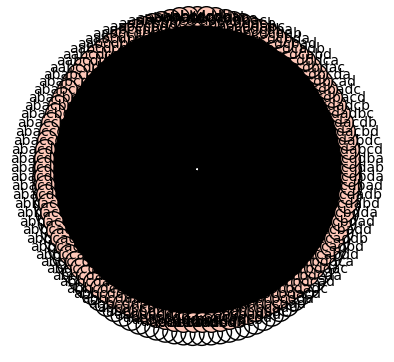

raw degree = C_8 = 1430
graph as 105 vertices


{'aabcddcb': 106,
 'abbcddac': 106,
 'abcdcbad': 106,
 'abcacdbd': 106,
 'abbccadd': 106,
 'abcadbcd': 104,
 'abcacbdd': 106,
 'abbaccdd': 106,
 'abacddbc': 106,
 'abcadcbd': 106,
 'aabccdbd': 106,
 'abacbddc': 106,
 'aabcdbdc': 106,
 'abcbddca': 106,
 'abcbcdda': 106,
 'abbcdacd': 106,
 'abcdbcad': 106,
 'abacdbcd': 106,
 'abcbacdd': 106,
 'ababcdcd': 106,
 'abaccdbd': 106,
 'ababccdd': 106,
 'abcddcab': 106,
 'aabcbddc': 106,
 'abcddcba': 106,
 'aabcbcdd': 106,
 'abcdcabd': 106,
 'abcabcdd': 106,
 'abcddbac': 106,
 'aabcdcdb': 106,
 'abcbdacd': 105,
 'abcdbcda': 106,
 'abccddba': 106,
 'abccdadb': 106,
 'aabcdcbd': 106,
 'abccbdad': 106,
 'abcdcdab': 105,
 'abcdcbda': 106,
 'ababcddc': 106,
 'abaccddb': 106,
 'abcdadbc': 106,
 'aabccbdd': 105,
 'abccaddb': 106,
 'abcbcadd': 106,
 'abbcdadc': 106,
 'abccadbd': 106,
 'abcdbdac': 106,
 'abcddabc': 106,
 'abccbadd': 106,
 'aabbcddc': 106,
 'abbccdad': 106,
 'abcaddbc': 106,
 'abcdcdba': 106,
 'aabbcdcd': 106,
 'abcdbadc': 105,
 'abcacddb

In [154]:
sort_graph = get_sort_graph(2,4)
print(f'graph as {sort_graph.order()} vertices')
get_degrees(sort_graph)

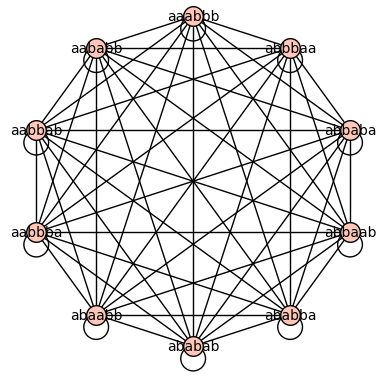

raw degree = C_6 = 132
graph as 10 vertices


{'ababab': 11,
 'ababba': 11,
 'aababb': 11,
 'aaabbb': 11,
 'abbbaa': 11,
 'abbaba': 11,
 'abaabb': 11,
 'aabbba': 11,
 'aabbab': 11,
 'abbaab': 11}

In [155]:
# contains self loops (actual degree = 9)
sort_graph = get_sort_graph(3,2)
print(f'graph as {sort_graph.order()} vertices')
get_degrees(sort_graph)

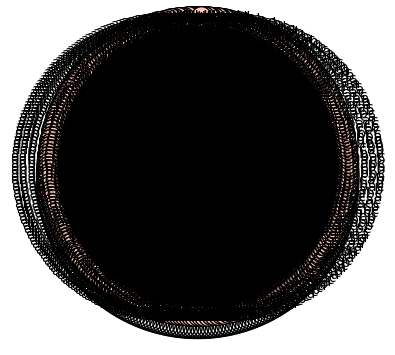

raw degree = C_9 = 4862
graph as 280 vertices


{'abbcbaacc': 281,
 'abbbcaacc': 281,
 'abbbaccac': 281,
 'abbacabcc': 281,
 'abacbcbca': 281,
 'aabbcabcc': 281,
 'abcbaacbc': 278,
 'abcabbacc': 279,
 'abccaacbb': 281,
 'abcabccab': 280,
 'abcabcbac': 274,
 'abcbbaacc': 281,
 'abbcabcca': 280,
 'abbccacab': 281,
 'abcbccaba': 281,
 'aaabbccbc': 281,
 'aabbbaccc': 277,
 'abccbaacb': 277,
 'abcbacbac': 276,
 'abcbaabcc': 279,
 'aabcacbbc': 281,
 'abbabccac': 281,
 'abcacabbc': 281,
 'abaccbabc': 278,
 'aabbcbcca': 277,
 'abccbbcaa': 281,
 'aabbabccc': 281,
 'abccaabbc': 281,
 'abccabcba': 280,
 'aababcccb': 281,
 'aabbacbcc': 281,
 'aabbcaccb': 281,
 'aabccbbca': 281,
 'aaabccbcb': 281,
 'abaacbbcc': 281,
 'abbaccbac': 281,
 'abbccbcaa': 281,
 'aabccbacb': 279,
 'abcacbbac': 275,
 'abaabccbc': 281,
 'ababacbcc': 281,
 'abacabcbc': 281,
 'abbcaacbc': 281,
 'abbabcacc': 281,
 'abcbacabc': 272,
 'ababcaccb': 281,
 'abbacacbc': 281,
 'abbacbcac': 281,
 'aabcbbcac': 281,
 'abbbcacca': 281,
 'abcacacbb': 281,
 'abaccbacb': 279,
 'abbacbacc'

In [156]:
sort_graph = get_sort_graph(3,3)
print(f'graph as {sort_graph.order()} vertices')
get_degrees(sort_graph)